#Voting Classifiers

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/apple_quality.csv')

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
df.drop(df.tail(1).index, inplace=True)
df.drop("A_id", axis=1, inplace=True)
df["Acidity"] = df["Acidity"].astype(float)

In [6]:
df.shape

(4000, 8)

In [7]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

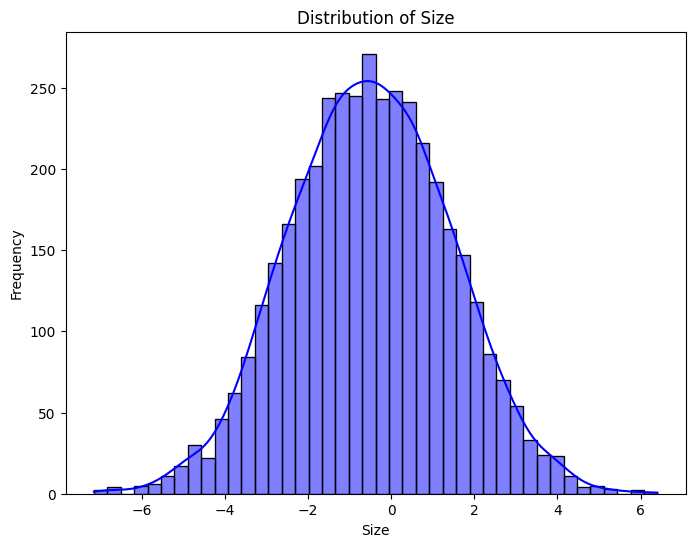

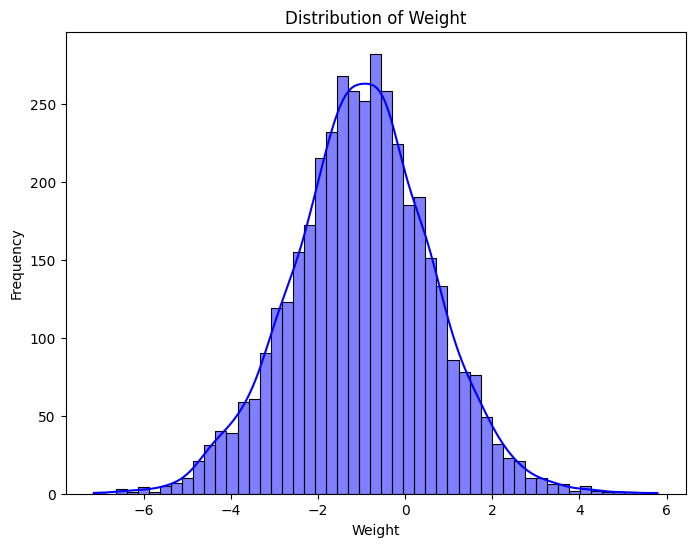

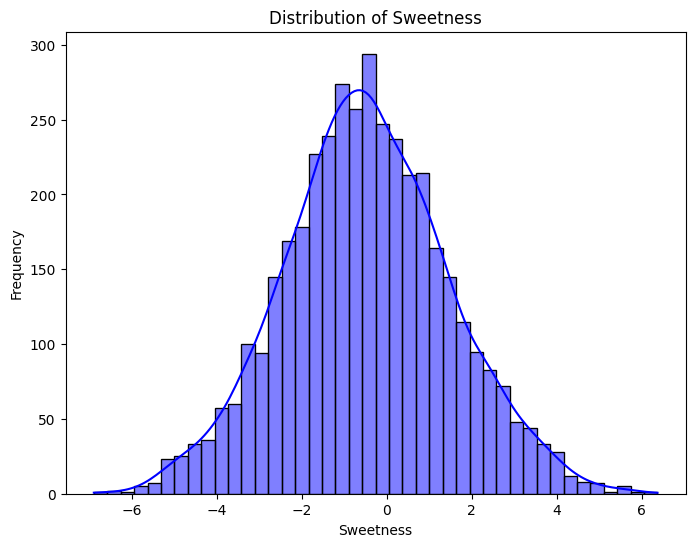

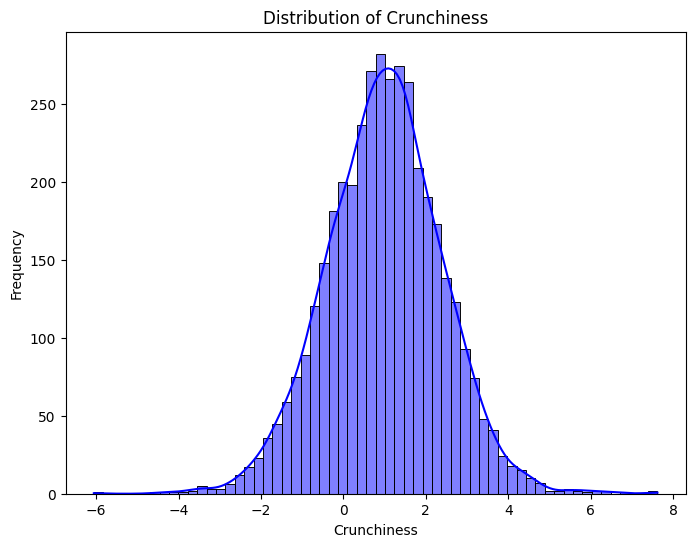

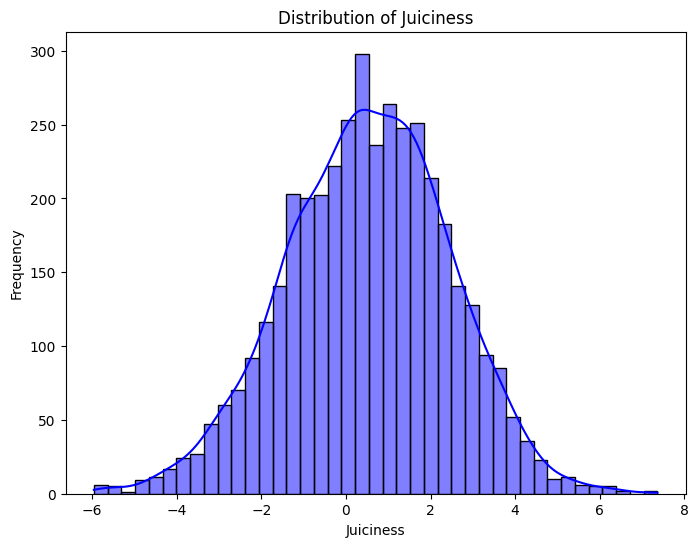

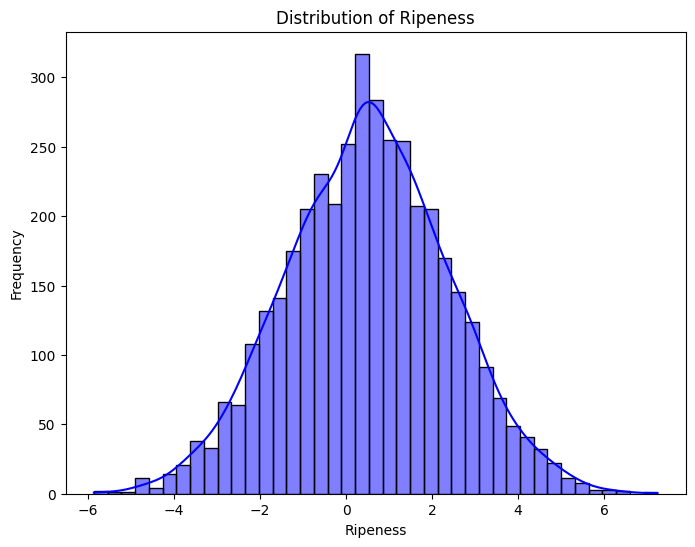

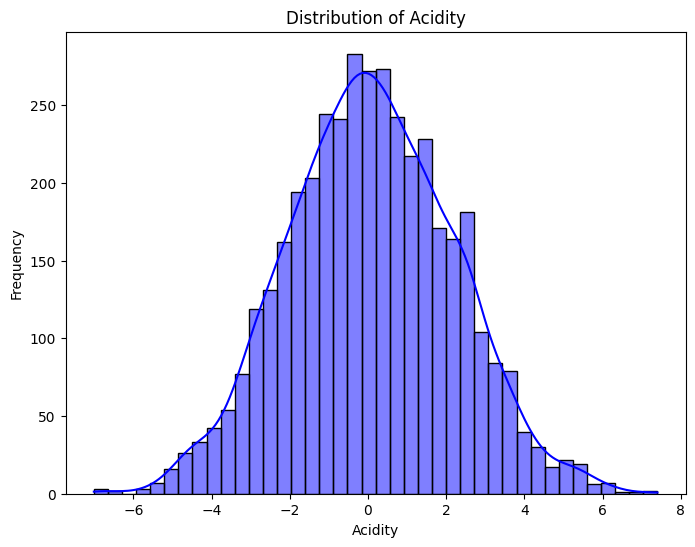

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


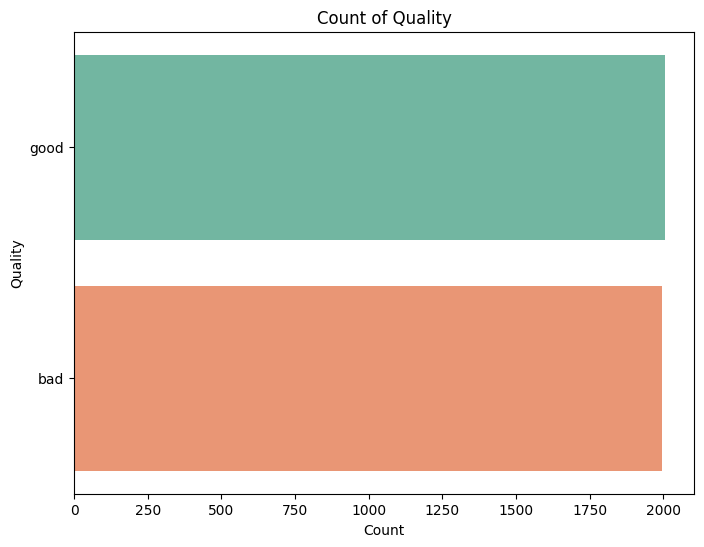

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [11]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

In [12]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
X = df.drop(columns=['Quality'])
y = df['Quality']

In [14]:
X_encoded = numeric_transformer.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=X.columns)

In [15]:
X_encoded

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [16]:
y_encoded = cat_transformer.fit_transform(y.values.reshape(-1, 1))
y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=cat_transformer.named_steps['encoder'].get_feature_names_out())
y_encoded_df.drop("x0_bad", axis=1, inplace=True)
print(y_encoded_df.head())

   x0_good
0      1.0
1      1.0
2      0.0
3      1.0
4      1.0


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded_df, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')

voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [19]:
accuracy = voting_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = voting_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

Accuracy of the best model in validation dataset: 0.885
Accuracy of the best model in test dataset: 0.87


In [20]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-20-7a50afc8a3b4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


LogisticRegression 0.74375
RandomForestClassifier 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.88625


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier 0.88


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from sklearn.metrics import accuracy_score

def Performance(model):
    global X_train,y_train,X_val,y_val,X_test,X_train

    print("REPORT:")
    print(classification_report(y_val,model.predict(X_val)))
    print(classification_report(y_test,model.predict(X_test)))

In [22]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X_train,y_train

    mean_cross_val_score = []
    model_name           = []

    for model in model_list:
        model_name.append(type(model).__name__)

    for i in model_list:
        scores = cross_val_score(i, X_train, y_train, cv=5)
        mean_cross_val_score.append(scores.mean())

    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

In [27]:
Performance(voting_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       393
         1.0       0.89      0.88      0.89       407

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       397
         1.0       0.88      0.88      0.88       403

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



#Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

accuracy = bag_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = bag_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.84
Accuracy of the best model in test dataset: 0.8275


In [29]:
Performance(bag_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       393
         1.0       0.85      0.84      0.84       407

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       397
         1.0       0.82      0.85      0.83       403

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



#Pasting

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
pas_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=False, n_jobs=-1)
pas_clf.fit(X_train, y_train)

accuracy = pas_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = pas_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.84375
Accuracy of the best model in test dataset: 0.8325


In [31]:
Performance(pas_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       393
         1.0       0.85      0.85      0.85       407

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       397
         1.0       0.82      0.86      0.84       403

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



#Out-of-Bag Explanation

In [33]:
bag_clf.oob_score

False

In [34]:
pas_clf.oob_score

False

#Random Patches

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_rp_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=True, n_jobs=-1)
bag_rp_clf.fit(X_train, y_train)

accuracy = bag_rp_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = bag_rp_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.86625
Accuracy of the best model in test dataset: 0.86


In [45]:
Performance(bag_rp_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       393
         1.0       0.83      0.81      0.82       407

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       397
         1.0       0.83      0.83      0.83       403

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



#Random Subspaces

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_rs_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=1.0, bootstrap=False, bootstrap_features=True,  max_features=0.99, n_jobs=-1)
bag_rs_clf.fit(X_train, y_train)

accuracy = bag_rs_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = bag_rs_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.845
Accuracy of the best model in test dataset: 0.845


In [50]:
Performance(bag_rs_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       393
         1.0       0.85      0.84      0.85       407

    accuracy                           0.84       800
   macro avg       0.84      0.85      0.84       800
weighted avg       0.85      0.84      0.85       800

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       397
         1.0       0.84      0.85      0.85       403

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



#Random Forests


In [51]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

accuracy = rnd_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = rnd_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

<ipython-input-51-5e018b0aa421>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


Accuracy of the best model in validation dataset: 0.84
Accuracy of the best model in test dataset: 0.83


In [52]:
Performance(rnd_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       393
         1.0       0.84      0.85      0.84       407

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       397
         1.0       0.82      0.85      0.83       403

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



#Feature Importance

In [56]:
for name, score in zip(df[df.columns], rnd_clf.feature_importances_):
  print(name, score)

Size 0.17701940013739448
Weight 0.09367936509391366
Sweetness 0.1535718835616745
Crunchiness 0.07954435665846915
Juiciness 0.19750940724772387
Ripeness 0.19537552838762068
Acidity 0.10330005891320361


Simulation of Random Forest Classifier with Bagging Classifier

In [54]:
sim_bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

sim_bag_clf.fit(X_train, y_train)

accuracy = sim_bag_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = sim_bag_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.82625
Accuracy of the best model in test dataset: 0.81125


In [55]:
Performance(sim_bag_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       393
         1.0       0.82      0.84      0.83       407

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       397
         1.0       0.79      0.84      0.82       403

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



#Extra-Trees

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
et_clf.fit(X_train, y_train)

accuracy = et_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = et_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

<ipython-input-57-c5472f6ee971>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_clf.fit(X_train, y_train)


Accuracy of the best model in validation dataset: 0.80875
Accuracy of the best model in test dataset: 0.7975


In [58]:
Performance(et_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       393
         1.0       0.82      0.80      0.81       407

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       397
         1.0       0.79      0.81      0.80       403

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



#Ada Boosting

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

accuracy = ada_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = ada_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.77875
Accuracy of the best model in test dataset: 0.7775


In [60]:
Performance(ada_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77       393
         1.0       0.78      0.79      0.78       407

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       397
         1.0       0.77      0.80      0.78       403

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



#Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

accuracy = gbrt.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = gbrt.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

Accuracy of the best model in validation dataset: 0.21880205916705997
Accuracy of the best model in test dataset: 0.22821836119703842


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With the optimal number of trees

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
 for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

accuracy = gbrt_best.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = gbrt_best.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the best model in validation dataset: 0.45991638278820546
Accuracy of the best model in test dataset: 0.45482634893461293


Early stopping

In [65]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break # early stopping

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

#XGBoost

In [66]:
import xgboost
xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train, y_train,
 eval_set=[(X_val, y_val)], early_stopping_rounds=2)

accuracy = xgb_clf.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = xgb_clf.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.58034
[1]	validation_0-logloss:0.50783
[2]	validation_0-logloss:0.45787
[3]	validation_0-logloss:0.42164
[4]	validation_0-logloss:0.39658
[5]	validation_0-logloss:0.37911
[6]	validation_0-logloss:0.36549
[7]	validation_0-logloss:0.35504
[8]	validation_0-logloss:0.34166
[9]	validation_0-logloss:0.33253
[10]	validation_0-logloss:0.32718
[11]	validation_0-logloss:0.32309
[12]	validation_0-logloss:0.32051
[13]	validation_0-logloss:0.31782
[14]	validation_0-logloss:0.31271
[15]	validation_0-logloss:0.31063
[16]	validation_0-logloss:0.30811
[17]	validation_0-logloss:0.30728
[18]	validation_0-logloss:0.30567
[19]	validation_0-logloss:0.30341
[20]	validation_0-logloss:0.30129
[21]	validation_0-logloss:0.29853
[22]	validation_0-logloss:0.29518
[23]	validation_0-logloss:0.29562
Accuracy of the best model in validation dataset: 0.87125
Accuracy of the best model in test dataset: 0.87125


In [70]:
Performance(xgb_clf)

REPORT:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       393
         1.0       0.88      0.87      0.87       407

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       397
         1.0       0.86      0.89      0.87       403

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

